In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline
plt.style.use('fivethirtyeight')

## Run this at the end for survey data

In [40]:
unique_titles = len(nodups)
total_ratings = len(dfwr['user_rating'])
total_users = df.drop_duplicates(subset='userid', keep='first', inplace=False)['userid'].count()

#users_without_ratings = 
df.head()

TypeError: object of type 'numpy.int64' has no len()

In [4]:
users = df.drop_duplicates(subset='userid', keep='first', inplace=False)
mask = users['userid'=='None']
users[mask]

KeyError: False

In [3]:
data = np.load('src/data/datacln.npy', allow_pickle = True)

df = pd.DataFrame(data, columns = ['title','author', 'isbn', 'book_type', 'pages', 'userid', 'user_rating', 'num_rate', 'av_rate'])  

#get rid of any users who haven't added any books, and any added books with no user rating
dfwr = df.dropna(axis=0)
actually_rated = dfwr['user_rating'] != 0
dfwr = dfwr[actually_rated]
#dfwr.info()
#dfwr.head()
dfwr.tail()

,title,author,isbn,book_type,pages,userid,user_rating,num_rate,av_rate
52338,Brideshead Revisited,"Waugh, Evelyn",9780316926348,format,351,56819785,5,88883,4
52339,The Remains of the Day,"Ishiguro, Kazuo",,format,258,56819785,5,180468,4.12
52340,Angela's Ashes,"McCourt, Frank",9780007205233,format,452,56819785,4,505641,4.1
52341,Girl with a Pearl Earring,"Chevalier, Tracy",9780452287020,format,233,56819785,4,588097,3.88
52342,"The Lewis Trilogy: The Blackhouse, The Lewis M...","May, Peter",,format,869,56819785,3,575,4.4


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52343 entries, 0 to 52342
Data columns (total 9 columns):
title          49655 non-null object
author         49655 non-null object
isbn           49655 non-null object
book_type      49655 non-null object
pages          47555 non-null object
userid         52343 non-null object
user_rating    49655 non-null object
num_rate       49655 non-null object
av_rate        49655 non-null object
dtypes: object(9)
memory usage: 3.6+ MB


In [31]:
total_users = df.drop_duplicates(subset='userid', keep='first', inplace=False)['userid'].count()
nodups

6494

In [5]:
df.head()

,title,author,isbn,book_type,pages,userid,user_rating,num_rate,av_rate
0,None,None,None,None,None,7171593,None,None,None
1,None,None,None,None,None,6060131,None,None,None
2,The Hunger Games,"Collins, Suzanne",9780439023481,format,374,22197300,5,5936319,4.33
3,Divergent,"Roth, Veronica",9780062024039,format,487,22197300,5,2706147,4.2
4,Shiver,"Stiefvater, Maggie",9780545123266,format,392,22197300,5,411613,3.77


In [6]:
from sqlalchemy import create_engine
import psycopg2 
import io

In [8]:
ratings = dfwr['user_rating']

av_rate presumably has some duplicates because of books read by more than one user. So lets sort those out. 

In [15]:
dfwr[['title', 'av_rate']].sort_values('title')

,title,av_rate
27312,"""A Problem from Hell"": America and the Age of ...",4.22
15336,"""B"" Is for Betsy",4.03
1370,"""B"" Is for Betsy",4.03
35338,"""C"" Is For Corpse",3.91
18211,"""Multiplication Is for White People"": Raising ...",4.14
...,...,...
768,百千さん家のあやかし王子 12 [Momochi-san Chi no Ayakashi O...,4.18
743,盾の勇者の成り上がり 11,4.11
516,青鸟书店（一部关于记忆与慰藉的书店史诗，触痛每个人内心深处的脆弱与柔软）,5
14224,나의 투쟁 1,4.08


In [19]:
total_users = df.drop_duplicates(subset='userid', keep='first', inplace=False)['userid'].count()


In [41]:
df.head()

,title,author,isbn,book_type,pages,userid,user_rating,num_rate,av_rate
0,None,None,None,None,None,7171593,None,None,None
1,None,None,None,None,None,6060131,None,None,None
2,The Hunger Games,"Collins, Suzanne",9780439023481,format,374,22197300,5,5936319,4.33
3,Divergent,"Roth, Veronica",9780062024039,format,487,22197300,5,2706147,4.2
4,Shiver,"Stiefvater, Maggie",9780545123266,format,392,22197300,5,411613,3.77


## make a quintile ranking for all books based on their average rating

In [5]:
quin = dfwr.drop_duplicates(subset='title', keep='first', inplace=False)
nums = quin['av_rate']
test = nums.quantile([.94])

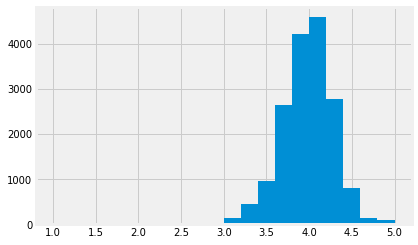

In [48]:
quin['av_rate'].hist(bins = 20)

In [18]:
nums.quantile(.97)

4.49

In [13]:
#dir(test)

In [7]:
x = 1
quants = []
while x > 0:
    x-=.01
    quants.append(nums.quantile(x))

ValueError: percentiles should all be in the interval [0, 1]. Try -7.528699885739343e-18 instead.

In [6]:
x = 2
x - 1

x

2

In [26]:
quants[1] ,quants[20], quants[40], quants[60], quants[80], quants[98]

(4.54, 4.21, 4.06, 3.92, 3.74, 3.15)

In [21]:
bad_books = dfwr[dfwr['av_rate'] < 3.1]['title']

In [17]:
dfwr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36471 entries, 2 to 52342
Data columns (total 9 columns):
title          36471 non-null object
author         36471 non-null object
isbn           36471 non-null object
book_type      36471 non-null object
pages          36471 non-null object
userid         36471 non-null object
user_rating    36471 non-null object
num_rate       36471 non-null object
av_rate        36471 non-null object
dtypes: object(9)
memory usage: 2.8+ MB


In [24]:
for names in bad_books:
    print(names)

Revolution 2020: Love, Corruption, Ambition
One Night at the Call Center
Four Blondes
Awakening
書呆子的反抗：為什麼你以為對的都是錯的？
The Rose Labyrinth
Welcome to Scranton
Tell It Like it Is! (Text with 2 DVD's): Natural Chinese for Advanced Learners
Leggende sarde
Christian Doctrine
Drug Trafficking, Corruption and States: How Illicit Networks Shaped Institutions in Colombia, Guatemala and Mexico
Glamour: Fashion, Industrial Design, Architecture
Full Frontal Fashion: The Insider's Guide to High Style in Every Situation
Stylemakers: Inside Fashion
The Continuity Girl
Le Divorce
The Conservative's Guide To Understanding Our Friends The Liberals
Extreme Breakup Recovery
How to Build a Fortune [With CD-ROM with Workbook and Trump Cards and DVD]
Quotable Michael Jordan: Words of Wit, Wisdom, and Inspiration by and about Michael Jordan, Basketball's Greatest Superstar
The Manny
L'Affaire
Dreaming in Hindi: Coming Awake in Another Language
Des mots en images
Now You See Him
The Emperor's Children
MRI Physic